In [3]:
#import DownloadData
import datetime
import datetime as dt#  --->NameError: name 'datetime' is not defined
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DownloadData_v2

from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns

import os
import importlib.machinery
import sys

cwd = os.getcwd()

#sys.path #returns all working directories 
print(cwd)
sys.path

C:\Users\miste


['C:\\Users\\miste',
 'C:\\Users\\miste\\anaconda3\\python37.zip',
 'C:\\Users\\miste\\anaconda3\\DLLs',
 'C:\\Users\\miste\\anaconda3\\lib',
 'C:\\Users\\miste\\anaconda3',
 '',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\miste\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\miste\\.ipython']

In [8]:
start = dt.datetime(1999, 1, 1)
end = dt.datetime.today()
frequency = 'DAILY'

sec_obj = DownloadData_v2.DownloadData(pair = 'EURUSD Curncy', fields = ['PX_LAST'], startDate = start, \
                                   endDate = end, \
                                   period = frequency, \
                                   source = 'blp')

sec = sec_obj.get_data_blp_historical(1)
print(sec.isnull().sum())

2021-08-08 14:42:53.779575


In [19]:
sec['ret'] = np.log(sec['PX_LAST']/sec['PX_LAST'].shift(1))
sec['ret'][0] = 0.0
sec.head()
#sec.plot(grid = True, figsize = (15,3))

,PX_LAST,ret
date,,
1999-01-01,1.1800,0.000000
1999-01-04,1.1837,0.003131
1999-01-05,1.1761,-0.006441
1999-01-06,1.1628,-0.011373
1999-01-07,1.1712,0.007198


In [35]:
sec_annual = sec.resample('M').last()
#sec_annual = sec.groupby(sec.index.month).agg('last')
sec_annual['ret'] = np.log(sec_annual['PX_LAST']/sec_annual['PX_LAST'].shift(1))
sec_annual

,PX_LAST,ret
date,,
1999-01-31,1.1362,NaN
1999-02-28,1.1028,-0.029837
1999-03-31,1.0762,-0.024416
1999-04-30,1.0570,-0.018002
1999-05-31,1.0420,-0.014293
...,...,...
2021-04-30,1.2020,0.024422
2021-05-31,1.2227,0.017075
2021-06-30,1.1858,-0.030644


In [41]:
df = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, columns = sec_annual.index.month, values = 'ret')
df

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
1999,NaN,-0.029837,-0.024416,-0.018002,-0.014293,-0.006644,0.034188,-0.013630,0.011106,-0.012716,-0.044189,-0.003076
2000,-0.035919,-0.006719,-0.009064,-0.046704,0.028220,0.015340,-0.027568,-0.042775,-0.005761,-0.039044,0.027880,0.076927
2001,-0.006492,-0.013977,-0.052114,0.014045,-0.050518,0.004368,0.031763,0.040146,-0.000987,-0.012032,-0.004563,-0.007727
2002,-0.034541,0.011570,0.002757,0.032505,0.036740,0.059428,-0.014017,0.004796,0.004368,0.003743,0.004031,0.053744
2003,0.025966,0.003523,0.010036,0.024346,0.052258,-0.023440,-0.024536,-0.022327,0.059381,-0.005420,0.034088,0.048810
2004,-0.009333,0.001201,-0.014269,-0.027661,0.017213,0.000902,-0.014948,0.013636,0.020554,0.028693,0.036895,0.020498
2005,-0.038814,0.014468,-0.020160,-0.007044,-0.045208,-0.016058,0.001238,0.018228,-0.026261,-0.002831,-0.017158,0.005161
2006,0.025579,-0.019521,0.016390,0.041700,0.013678,-0.001406,-0.001800,0.003597,-0.010908,0.006919,0.036997,-0.003328
2007,-0.012656,0.014927,0.009405,0.021777,-0.014391,0.006594,0.010358,-0.003881,0.045676,0.015372,0.009959,-0.002943


In [139]:
df.median(axis = 0)

date
1    -0.006572
2    -0.005877
3     0.000363
4     0.005783
5    -0.012994
6     0.004245
7     0.000770
8    -0.001612
9    -0.000450
10   -0.004125
11    0.000648
12    0.012099
dtype: float64

In [137]:
df.describe()

date,1,2,3,4,5,6,7,8,9,10,11,12
count,22.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,22.000000,22.000000,22.000000,22.000000
mean,-0.008020,-0.003557,-0.000926,0.006435,-0.006139,0.004377,0.003458,-0.003415,0.002487,-0.005242,-0.002161,0.014264
std,0.032129,0.016608,0.025359,0.024542,0.036811,0.017872,0.025788,0.022154,0.032613,0.028359,0.028950,0.033861
min,-0.086745,-0.039129,-0.052114,-0.046704,-0.077301,-0.030644,-0.028997,-0.061386,-0.071201,-0.102110,-0.071629,-0.046241
25%,-0.029286,-0.015500,-0.016294,-0.009235,-0.028454,-0.003576,-0.014840,-0.011427,-0.010282,-0.013921,-0.015868,-0.003265
50%,-0.006572,-0.005877,0.000363,0.005783,-0.012994,0.004245,0.000770,-0.001612,-0.000450,-0.004125,0.000648,0.012099
75%,0.021606,0.009858,0.010321,0.024384,0.017144,0.013694,0.019016,0.009526,0.020878,0.007598,0.021245,0.026384
max,0.033502,0.023087,0.045575,0.044918,0.067934,0.059428,0.064401,0.040146,0.072546,0.034432,0.036997,0.096313


          mean       sum
date                    
1    -0.008020 -0.176451
2    -0.003557 -0.081819
3    -0.000926 -0.021297
4     0.006435  0.148016
5    -0.006139 -0.141196
6     0.004377  0.100663
7     0.003458  0.079544
8    -0.003415 -0.078534
9     0.002487  0.054720
10   -0.005242 -0.115320
11   -0.002161 -0.047533
12    0.014264  0.313806


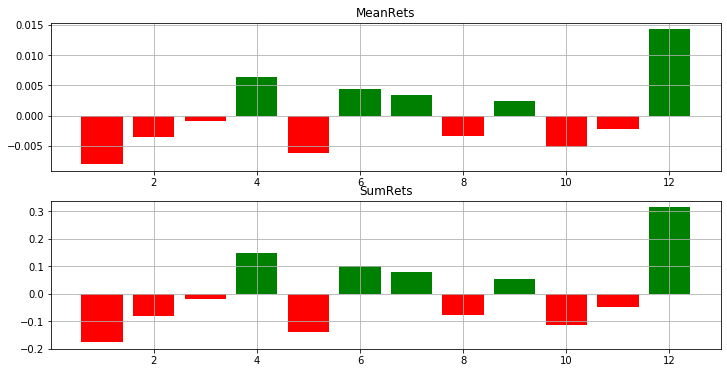

In [136]:
plt.figure(figsize=(12, 6)) #this has to be the first 
plt.grid(True)
plt.subplot(211) # 1st plot settings start here: (*nrows*, *ncols*, *index*/position)

y_mean = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').mean() #.plot(kind = 'bar', grid = True, figsize = (12, 3))

y_sum = pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').sum()

y = pd.DataFrame({'mean': y_mean,
                    'sum': y_sum})

print(y)
x = y.index #months 1 to t12

coloring = []
for val in y.iloc[:,0]:
    if val < 0:
        coloring.append('red')
    else:
        coloring.append('green')
        
plt.bar(x, y.iloc[:, 0], color = coloring)
plt.grid(True)
plt.title('MeanRets', fontdict = {'fontsize': 12}, loc = 'center')

plt.subplot(212)
plt.grid(True)
for val in y.iloc[:,1]:
    if val < 0:
        coloring.append('red')
    else:
        coloring.append('green')
plt.bar(x, y.iloc[:, 1], color =coloring )
plt.title('SumRets', fontdict = {'fontsize': 12}, loc = 'center')
plt.show()

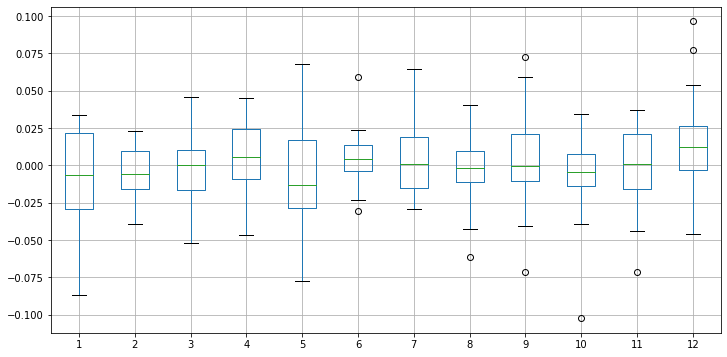

In [53]:
pd.pivot_table(data = sec_annual, index = sec_annual.index.year, \
               columns = sec_annual.index.month, values = 'ret').plot(kind = 'box', grid = True, figsize = (12, 6))